# <font color=#cd0000> Propósito principal </font>
- La idea de este librillo es comprobar el desempeño de Random Forest sobre el conjunto de datos HeartBeat original.

## <font color=#cd0000> Leyenda </font>
- Los apartados titulados con el código de colores HEX: `#cd0000` serán apartados que tendrán todos los librillos, en concreto, aquellos especificados en el apartado `Síntesis de los criterios usados` del trabajo.
- Los apartados titulados con el código de colores HEX: `#2451ff` serán apartados de conclusiones propias de este librillo resultado de aplicar un estudio personalizado para cada planteamiento.

# <font color=#cd0000> Prerrequisitos </font>
## <font color=#cd0000> Entorno de ejecución </font>
- Cambiamos el directorio raíz del librillo para acceder cómodamente a las funciones de utilidad.

In [1]:
import os

os.chdir('../../../../')
os.listdir()


['.git',
 '.gitignore',
 '.gitmodules',
 'data',
 'HeartBeat_tmp_test_data.pkl',
 'HeartBeat_tmp_train_data.pkl',
 'pkl',
 'Pruebas',
 'README.md',
 'smts_implementation',
 'utils']

## <font color=#cd0000> Constantes y variables predefinidas </font>

In [2]:
HEARTBEAT_PATH = "data/heartbeat"

DATA_TO_SAVE = "HeartBeat"

PKL_DIR = "pkl/RF/HeartBeat/"
PKL_NAME = "heartbeat_RF_raw.pkl"

SEED = 1


# <font color=#cd0000> Carga del Dataset </font>

In [3]:
from utils.load_data import import_heartbeat_dataset

train, test = import_heartbeat_dataset(HEARTBEAT_PATH)

In [4]:
import pickle

pickle.dump(train, open(DATA_TO_SAVE + "_tmp_train_data.pkl", 'wb'))
pickle.dump(test, open(DATA_TO_SAVE + "_tmp_test_data.pkl", 'wb'))


In [5]:
import pickle

train = pickle.load(open(DATA_TO_SAVE + "_tmp_train_data.pkl", 'rb'))
test = pickle.load(open(DATA_TO_SAVE + "_tmp_test_data.pkl", 'rb'))


In [6]:
train.reset_changes()
test.reset_changes()


# <font color=#cd0000> Preprocesamiento </font>

## <font color=#cd0000> Eliminación de datos inválidos y valores atípicos </font>
- Como ya anticipamos en el análisis en profundidad de este conjunto de datos eliminaremos todos los atributos dado su alto grado de correlación salvo los atributos: `signal_1`, `signal_10`, `signal_20`, `signal_30`, `signal_40`, `signal_50` y `signal_60`
- Eliminaremos aquellos valores fuera de los percentiles 5 y 95.

### <font color=#2451ff> Eliminación de atributos altamente correlacionados </font>

In [7]:
columns_to_remove = train.get_derived_data_columns()['attrs']
column_to_study = ['signal_1', 'signal_10', 'signal_20',
                   'signal_30', 'signal_40', 'signal_50', 'signal_60']

for col in columns_to_remove:
    if col in column_to_study:
        columns_to_remove.remove(col)

train.drop_derived_data_columns(columns_to_remove)
test.drop_derived_data_columns(columns_to_remove)


,id,TimeStamp,signal_1,signal_10,signal_20,signal_30,signal_40,signal_50,signal_60,class
0,0,0,0.004578,0.009483,0.003414,0.009437,0.008221,0.030211,1.000400,normal
1,0,1,0.011682,0.013566,0.004089,0.012686,0.012927,0.070100,0.673670,normal
2,0,2,0.017709,0.019086,0.011413,0.030151,0.039722,0.100600,0.904520,normal
3,0,3,0.016318,0.017490,0.016408,0.044615,0.059496,0.091279,1.322500,normal
4,0,4,0.011723,0.008481,0.008594,0.025718,0.030744,0.024211,1.622600,normal
...,...,...,...,...,...,...,...,...,...,...
83020,204,400,0.007057,0.001993,0.005595,0.003932,0.002723,0.002055,0.353420,abnormal
83021,204,401,0.012607,0.002142,0.004760,0.000763,0.002429,0.001636,0.349890,abnormal
83022,204,402,0.011410,0.004370,0.000505,0.000902,0.002300,0.001022,0.264820,abnormal
83023,204,403,0.008735,0.003033,0.001830,0.001835,0.004181,0.002472,0.130270,abnormal


### <font color=#2451ff> Eliminación de outliers </font>
- El grado de outliers mínimo en, al menos, una dimensión para eliminar una serie temporal será del 80% (si más del 80% de los datos son anómalos descartamos la serie).
  - A pesar de que esto pueda parecer muy grande debemos comprender que, la probabilidad con la que aparezca ruido en una de las dimensiones de una serie temporal multivariada, es muy alta (tenemos varias series temporales con ruido cada una).

In [8]:
train.remove_outliers(
    headers=train.get_derived_data_columns()['attrs'],
    outliers_limit=.8
)

test.remove_outliers(
    headers=test.get_derived_data_columns()['attrs'],
    outliers_limit=.8
)


In [9]:
import pandas as pd

# Remaining series
print("Train: Previous number of series: {}".format(
    len(pd.unique(train.original_data['id']))))
print("Train: Actual number of series: {}".format(
    len(pd.unique(train.derived_data['id']))))

print("Test: Previous number of series: {}".format(
    len(pd.unique(test.original_data['id']))))
print("Test: Actual number of series: {}".format(
    len(pd.unique(test.derived_data['id']))))


Train: Previous number of series: 204
Train: Actual number of series: 198
Test: Previous number of series: 205
Test: Actual number of series: 199


## <font color=#cd0000> Resoluciones a aplicar </font>
- Como concluimos en el análisis en profundidad, mantendremos la resolución original.

In [10]:
# Nothing to see here


# <font color=#cd0000> División en ventanas </font>
- Como concluimos en el análisis en profundidad no aplicaremos enventanado pues ya está preaplicado.

In [11]:
# Nothing to see here


## <font color=#cd0000> Codificación </font>
- Series originales (no aplicamos ninguna codificación extra)

In [12]:
# Nothing to see here


# <font color=#cd0000> Preparación de los datos </font>

In [13]:
X_train = train.derived_data.drop(['id', 'class'], axis=1)
X_test = test.derived_data.drop(['id', 'class'], axis=1)

y_train = train.derived_data['class'].to_numpy()
y_test = test.derived_data['class'].to_numpy()

## <font color=#cd0000> Técnicas de balanceo </font>

### <font color=#cd0000> Asignación de pesos a las clases </font>

In [14]:
import numpy as np
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train)
class_weights = {'abnormal': class_weights[0], 'normal': class_weights[1]}


# <font color=#cd0000> Diseño de la topología del bosque </font>
- Número de estimadores inicial recomendado
- Profundidad máxima recomendada

## <font color=#cd0000> Entrenamiento </font>

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=200,
    random_state=SEED,
    class_weight=class_weights
)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, random_state=1)

## <font color=#cd0000> Clasificación </font>

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
y_true = np.asarray(y_test)
    
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, zero_division=0))


[[52563  5352]
 [18254  4426]]
              precision    recall  f1-score   support

    abnormal       0.74      0.91      0.82     57915
      normal       0.45      0.20      0.27     22680

    accuracy                           0.71     80595
   macro avg       0.60      0.55      0.54     80595
weighted avg       0.66      0.71      0.66     80595



## <font color=#cd0000> Discusión de los resultados </font>
- Como podemos observar, el desempeño de este clasificador se ajusta a las predicciones de uno que no es capaz de clasificar correctamente la clase desbalanceada e, incluso tomando medidas al respecto, este no es capaz de generalizar lo suficiente.
- Vamos a estudiar diferentes rangos de hiper-parámetros interesantes que podrían darnos alguna pista sobre el rango en el que buscar el mejor clasificador de este tipo:
  - Para un `n_estimators` pequeño (10) y una `max_depth` pequeño (10) observamos resultados muy malos en lo que a la capacidad de generalización del clasificador se refiere (clasifica muy bien, únicamente, ejemplos de la clase `abnormal`):
    ```
    Confusion matrix:
    [[55146  2769]
     [19987  2693]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.73      0.95      0.83     57915
          normal       0.49      0.12      0.19     22680

        accuracy                           0.72     80595
       macro avg       0.61      0.54      0.51     80595
    weighted avg       0.67      0.72      0.65     80595
    ```
  - Para un `n_estimators` pequeño (10) y una `max_depth` muy grande (200) observamos un mejor ajuste de la clase minoritaria pero seguimos obteniendo resultados malos, vamos a probar a aumentar el número de estimadores:
    ```
    Confusion matrix:
    [[51523  6392]
     [18120  4560]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.74      0.89      0.81     57915
          normal       0.42      0.20      0.27     22680

        accuracy                           0.70     80595
       macro avg       0.58      0.55      0.54     80595
    weighted avg       0.65      0.70      0.66     80595
    ```
  - Para un `n_estimators` grande (200) y una `max_depth` grande (200) podemos observar que aumenta significativamente el tiempo de entrenamiento y obtenemos resultados algo peores a los anteriores (visibles en el recall de la clase minoritaria) vamos a probar a reducir el número de estimadores a la mitad:
    ```
    Confusion matrix:
    [[52661  5254]
     [18341  4339]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.74      0.91      0.82     57915
          normal       0.45      0.19      0.27     22680

        accuracy                           0.71     80595
       macro avg       0.60      0.55      0.54     80595
    weighted avg       0.66      0.71      0.66     80595
    ```
  - Para un `n_estimators` intermedio (100) y una `max_depth` grande (200) observamos que los resultados mejoran ligeramente en el recall de la clase minoritaria:
    ```
    Confusion matrix:
    [[52563  5352]
     [18254  4426]]

    Classification report:
                      precision    recall  f1-score   support

        abnormal       0.74      0.91      0.82     57915
          normal       0.45      0.20      0.27     22680

        accuracy                           0.71     80595
       macro avg       0.60      0.55      0.54     80595
    weighted avg       0.66      0.71      0.66     80595
    ```

## <font color=#cd0000> Conclusiones </font>
- Como podemos observar este clasificador no es el más indicado (al menos con esta codificación) para resolver este tipo de problema donde no se tienen en cuenta el orden de las secuencias de los datos (ya que RandomForest utiliza la técnica de Bagging).
- No obstante si no tuviéramos más remedio que utilizarlo de esta forma buscaríamos el mejor en el rango orientativo:
  - `n_estimators`: [10, 100]
  - `max_depth`: [100, 200]

# <font color=#cd0000> Randomized Search </font>
- Búsqueda de hiper-parámetros aleatoria con RF maximizando ``macro avg f1-score``

## <font color=#cd0000> Rangos de búsqueda </font>
- Como vimos anteriormente los rangos de búsqueda aleatoria de los mejores hiper-parámetros serán los siguientes

In [17]:
N_ESTIMATORS_RANGE = range(10, 100)
MAX_DEPTH_RANGE = range(100, 200)

In [18]:
import random
import pickle
import utils.constants as cs
from sklearn.ensemble import RandomForestClassifier
from utils.classifier_utils import (windowed_cross_val,
                                    compute_classification_reports_means)
from utils.plot_utils import pretty_print_classification_report_dict


def rf_randomized_search_cv(
        windowed_series,
        relation_with_series,
        prefix,
        class_weights,
        cv=5):
    global PKL_DIR
    all_clf_used = {}

    n_samples = 5
    n_estimators_list = random.sample(list(N_ESTIMATORS_RANGE), n_samples)
    max_depth_list = random.sample(list(MAX_DEPTH_RANGE), n_samples)

    best_hyp_params = None
    best_score = 0
    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            clf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                random_state=SEED,
                class_weight=class_weights
            )

            reports = windowed_cross_val(
                clf,
                windowed_series,
                relation_with_series,
                estimator_type=cs.ESTIMATOR_SKLEARN,
                cv=cv,
                drop_columns=['id', 'class'],
                seed=SEED
            )
            mean_report = compute_classification_reports_means(reports)
            all_clf_used[(n_estimators, max_depth)] = mean_report

            if mean_report['macro avg']['f1-score'][0] >= best_score:
                best_score = mean_report['macro avg']['f1-score'][0]
                best_hyp_params = (n_estimators, max_depth)
                best_report = mean_report

            print("\t\t--------------ACTUAL BEST: N_Estimators={}; Max_Depth={}--------------"
                  .format(best_hyp_params[0], best_hyp_params[1]))
            pretty_print_classification_report_dict(best_report)
            print("\t\t--------------ITERATION: N_Estimators={}; Max_Depth={}--------------"
                  .format(n_estimators, max_depth))
            pretty_print_classification_report_dict(mean_report)

    with open(PKL_DIR + prefix, 'wb') as file:
        pickle.dump(all_clf_used, file)

    return best_hyp_params, best_report


In [19]:
rf_randomized_search_cv(
    train.derived_data,
    train.derived_data_windows_per_serie,
    PKL_NAME,
    class_weights,
    cv=5)


		--------------ACTUAL BEST: N_Estimators=73; Max_Depth=149--------------
Accuracy: 0.7039340230919178 +/- 0.05017152076365885
abnormal:
	precision: 0.7344658949735967 +/- 0.0657849707903408
	recall: 0.9173649703566035 +/- 0.031385981525855214
	f1-score: 0.8135245623620625 +/- 0.03959536305236351
	support: 11421.0 +/- 1128.1994504519137
normal:
	precision: 0.488668630134195 +/- 0.10459874550773965
	recall: 0.18553362686696018 +/- 0.03502349657141947
	f1-score: 0.2608379827492783 +/- 0.031901147050858565
	support: 4617.0 +/- 978.7267238611604
macro avg:
	precision: 0.6115672625538957 +/- 0.0421210623159674
	recall: 0.5514492986117819 +/- 0.014271880391600046
	f1-score: 0.5371812725556704 +/- 0.03076275414807931
	support: 16038.0 +/- 413.0205806010156
weighted avg:
	precision: 0.6721103184096598 +/- 0.04678100593403837
	recall: 0.7039340230919178 +/- 0.05017152076365885
	f1-score: 0.6555788593125073 +/- 0.06595130686839941
	support: 16038.0 +/- 413.0205806010156
		--------------ITERATION

((73, 117),
 {'accuracy': (0.7039340230919178, 0.05017152076365885),
  'abnormal': {'precision': (0.7344658949735967, 0.0657849707903408),
   'recall': (0.9173649703566035, 0.031385981525855214),
   'f1-score': (0.8135245623620625, 0.03959536305236351),
   'support': (11421.0, 1128.1994504519137)},
  'normal': {'precision': (0.488668630134195, 0.10459874550773965),
   'recall': (0.18553362686696018, 0.03502349657141947),
   'f1-score': (0.2608379827492783, 0.031901147050858565),
   'support': (4617.0, 978.7267238611604)},
  'macro avg': {'precision': (0.6115672625538957, 0.0421210623159674),
   'recall': (0.5514492986117819, 0.014271880391600046),
   'f1-score': (0.5371812725556704, 0.03076275414807931),
   'support': (16038.0, 413.0205806010156)},
  'weighted avg': {'precision': (0.6721103184096598, 0.04678100593403837),
   'recall': (0.7039340230919178, 0.05017152076365885),
   'f1-score': (0.6555788593125073, 0.06595130686839941),
   'support': (16038.0, 413.0205806010156)}})

# <font color=#cd0000> Randomized Search con múltiples ejecuciones en lugar de Validación Cruzada </font>
- No llevaremos a cabo esta aproximación ya que tenemos datos suficientes como para ejecutar validación cruzada.

In [20]:
# Nothing to see here

# <font color=#cd0000> Análisis de resultados </font>
- Según la búsqueda aleatoria de hiper-parámetros, la mejor combinación, es la de ``n_estimators`` = 73 y ``max_depth`` = 117:
    ```
    Accuracy: 0.7039340230919178 +/- 0.05017152076365885
    abnormal:
        precision: 0.7344658949735967 +/- 0.0657849707903408
        recall: 0.9173649703566035 +/- 0.031385981525855214
        f1-score: 0.8135245623620625 +/- 0.03959536305236351
        support: 11421.0 +/- 1128.1994504519137
    normal:
        precision: 0.488668630134195 +/- 0.10459874550773965
        recall: 0.18553362686696018 +/- 0.03502349657141947
        f1-score: 0.2608379827492783 +/- 0.031901147050858565
        support: 4617.0 +/- 978.7267238611604
    macro avg:
        precision: 0.6115672625538957 +/- 0.0421210623159674
        recall: 0.5514492986117819 +/- 0.014271880391600046
        f1-score: 0.5371812725556704 +/- 0.03076275414807931
        support: 16038.0 +/- 413.0205806010156
    weighted avg:
        precision: 0.6721103184096598 +/- 0.04678100593403837
        recall: 0.7039340230919178 +/- 0.05017152076365885
        f1-score: 0.6555788593125073 +/- 0.06595130686839941
        support: 16038.0 +/- 413.0205806010156
    ```
- Ahora vamos a visualizar la evolución de los resultados (25 resultados) para observar cómo avanza nuestra métrica objetivo -> Macro Average F1-Score.

In [3]:
import pickle

all_reports = pickle.load(open(PKL_DIR + PKL_NAME, 'rb'))


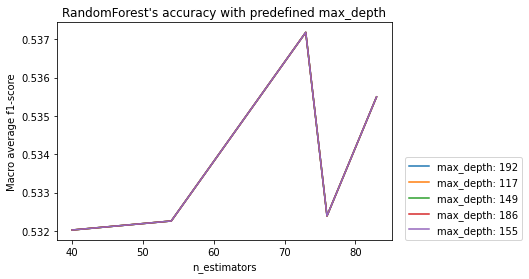

In [22]:
from utils.plot_utils import plot_score

macro_avg_f1_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['macro avg']['f1-score'][0],
                   'std': all_reports[z]['macro avg']['f1-score'][1]}),
    all_reports
))

plot_score(
    [macro_avg_f1_scores],
    ('n_estimators', 'max_depth'),
    'RandomForest',
    inverse=False,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Macro Average F1-Score'
)


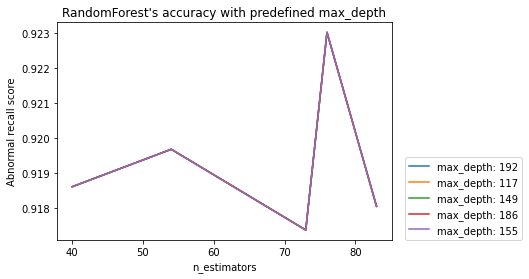

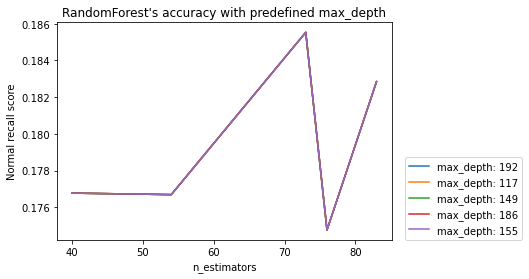

In [23]:
abnormal_recall_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['abnormal']['recall'][0],
                   'std': all_reports[z]['abnormal']['recall'][1]}),
    all_reports
))

normal_recall_scores = dict(map(
    lambda z: (z, {'score': all_reports[z]['normal']['recall'][0],
                   'std': all_reports[z]['normal']['recall'][1]}),
    all_reports
))

plot_score(
    [abnormal_recall_scores],
    ('n_estimators', 'max_depth'),
    'RandomForest',
    inverse=False,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Abnormal recall score'
)

plot_score(
    [normal_recall_scores],
    ('n_estimators', 'max_depth'),
    'RandomForest',
    inverse=False,
    mode='score',
    in_same_graphic=True,
    accuracy_mode='accuracy',
    metric_name='Normal recall score'
)


## <font color=#cd0000> Evaluación sobre el conjunto de validación </font>
- Vamos a llevar a cabo la evaluación final sobre el conjunto de validación (esto es lo que irá al apartado de ``Pruebas y Resultados`` de la memoria).

### <font color=#cd0000> Entrenamiento </font>

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=73,
    max_depth=117,
    class_weight=class_weights,
    random_state=SEED
)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight={'abnormal': 0.7021276595744681,
                                     'normal': 1.736842105263158},
                       max_depth=117, n_estimators=73, random_state=1)

### <font color=#cd0000> Clasificación </font>

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)
y_true = np.asarray(y_test)
    
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, zero_division=0))


[[52818  5097]
 [18584  4096]]
              precision    recall  f1-score   support

    abnormal       0.74      0.91      0.82     57915
      normal       0.45      0.18      0.26     22680

    accuracy                           0.71     80595
   macro avg       0.59      0.55      0.54     80595
weighted avg       0.66      0.71      0.66     80595



# <font color=#cd0000> Conclusiones </font>
- Como podemos observar en los gráficos obtenidos en el apartado de análisis de resultados, cuanto más profundo son los árboles del bosque peor clasifica la clase minoritaria y esto puede darse a que el bosque se sobreajusta significativamente y se limita a clasificar mejor los ejemplos de la clase mayoritaria.
- No obstante, frente al conjunto de validación el mejor clasificador es aquel con una profundidad máxima menor que generaliza mejor los datos de la clase minoritaria.
- Sin embargo, como ya veíamos anteriormente, este clasificador con la codificación actual no es el adecuado para enfrentarse a esta tarea de clasificación como consecuencia de la distribución aleatoria de los datos de cada serie entre los estimadores usando la técnica Bagging. 